In [35]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
from IPython import display

In [36]:
# 生成人工数据集

n_train, n_test, num_inputs = 20, 100, 200
batch_size = 5

true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train= False)

In [37]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad= True)
    b = torch.zeros(1, requires_grad= True)
    return [w, b]

# L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [44]:
def train(lambd):
    w, b = init_params()
    net = lambda X: d2l.linreg(X, w, b)
    loss = d2l.squared_loss
    num_epochs = 1000
    lr = 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])

    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)

        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))

    print('w的L2范数是:', torch.norm(w).item())


w的L2范数是: 14.287958145141602


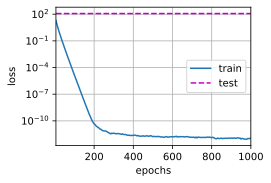

In [45]:
train(lambd= 0)

w的L2范数是: 0.029589468613266945


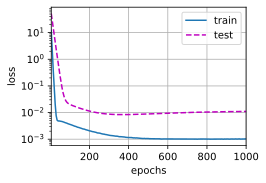

In [46]:
train(5)